findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.


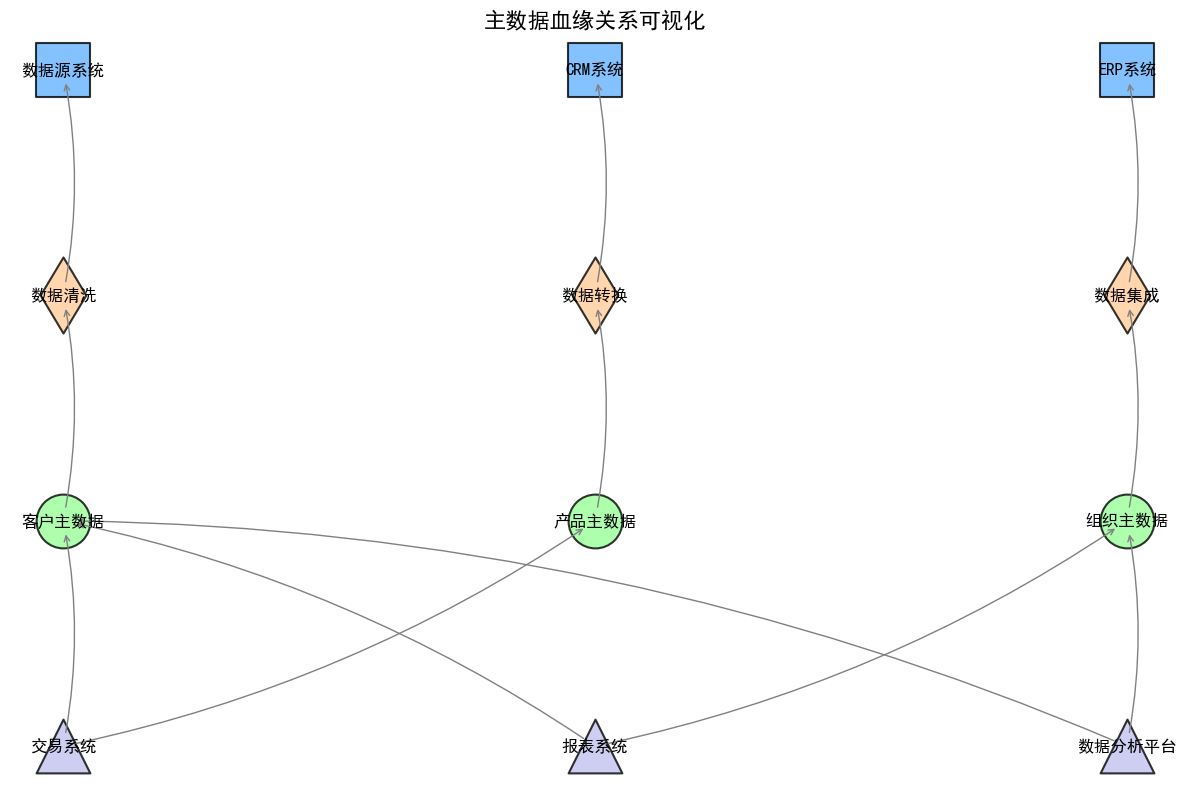

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# 设置中文字体支持
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]

# 创建有向图
G = nx.DiGraph()

# 添加节点（系统/数据实体）
# 数据源系统
G.add_node("数据源系统", type="source", layer=0)
G.add_node("CRM系统", type="source", layer=0)
G.add_node("ERP系统", type="source", layer=0)

# 数据处理层
G.add_node("数据清洗", type="process", layer=1)
G.add_node("数据转换", type="process", layer=1)
G.add_node("数据集成", type="process", layer=1)

# 主数据中心
G.add_node("客户主数据", type="master", layer=2)
G.add_node("产品主数据", type="master", layer=2)
G.add_node("组织主数据", type="master", layer=2)

# 目标系统
G.add_node("交易系统", type="target", layer=3)
G.add_node("报表系统", type="target", layer=3)
G.add_node("数据分析平台", type="target", layer=3)

# 添加边（数据流向）
edges = [
    ("数据源系统", "数据清洗"),
    ("CRM系统", "数据转换"),
    ("ERP系统", "数据集成"),
    ("数据清洗", "客户主数据"),
    ("数据转换", "产品主数据"),
    ("数据集成", "组织主数据"),
    ("客户主数据", "交易系统"),
    ("客户主数据", "报表系统"),
    ("产品主数据", "交易系统"),
    ("组织主数据", "报表系统"),
    ("组织主数据", "数据分析平台"),
    ("客户主数据", "数据分析平台"),
]
G.add_edges_from(edges)

# 定义节点颜色映射
color_map = {
    "source": "#66b3ff",  # 蓝色：数据源
    "process": "#ffcc99",  # 橙色：处理过程
    "master": "#99ff99",  # 绿色：主数据
    "target": "#c2c2f0",  # 紫色：目标系统
}

# 定义节点形状映射
shape_map = {
    "source": "s",  # 正方形：数据源
    "process": "d",  # 菱形：处理过程
    "master": "o",  # 圆形：主数据
    "target": "^",  # 三角形：目标系统
}

# 为节点分配x,y坐标（按层级排列）
pos = {}
for layer in range(4):
    nodes_in_layer = [n for n, d in G.nodes(data=True) if d.get("layer", 0) == layer]
    x_spacing = 1.0 / (len(nodes_in_layer) + 1)
    for i, node in enumerate(nodes_in_layer):
        pos[node] = ((i + 1) * x_spacing, -layer)  # y坐标为负，使层数向下增长

# 创建图形
plt.figure(figsize=(12, 8))

# 按类型绘制节点
for node_type in color_map.keys():
    nodes_of_type = [n for n, d in G.nodes(data=True) if d.get("type") == node_type]
    if nodes_of_type:
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=nodes_of_type,
            node_color=color_map[node_type],
            node_shape=shape_map[node_type],
            node_size=1500,
            alpha=0.8,
            edgecolors='black',
            linewidths=1.5
        )

# 绘制边（使用曲线箭头）
ax = plt.gca()
for edge in G.edges():
    source, target = edge
    ax.annotate("",
                xy=pos[source], xycoords='data',
                xytext=pos[target], textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                color="0.5",
                                shrinkA=10, shrinkB=10,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.1",  # 曲线连接
                                ),
                )

# 绘制节点标签
nx.draw_networkx_labels(G, pos, font_size=12, font_family="SimHei")

# 设置图表属性
plt.title("主数据血缘关系可视化", fontsize=16)
plt.axis("off")
plt.tight_layout()

# 显示图形
plt.show()    